# Harmatpont 3D Vizualizáció

Ez a notebook a harmatpont függvényt mutatja be 3D grafikonon.

- **X tengely**: Hőmérséklet (°C)
- **Y tengely**: Relatív páratartalom (%)
- **Z tengely**: Harmatpont értéke (°C)

A harmatpont számításához a Magnus formulát használjuk:
- a = 17.62
- b = 243.12 °C

In [ ]:
# Szükséges könyvtárak importálása
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

# Statikus matplotlib backend beállítása
plt.style.use('default')

print("Könyvtárak sikeresen importálva!")

Könyvtárak sikeresen importálva!
Statikus 3D grafikonok - egyszerű és gyors megjelenítés!


## 3D Grafikonok

A notebook statikus 3D grafikonokat jelenít meg a harmatpont függvényről.

### Jellemzők:
- **Gyors renderelés** - Nincs szükség extra csomagokra
- **Tiszta megjelenítés** - Statikus, jól olvasható grafikonok  
- **Kompatibilitás** - Minden környezetben működik

### Grafikonok:
1. **3D felületgrafikon** - A teljes harmatpont függvény
2. **2D kontúrgrafikonok** - Alternatív megjelenítés
3. **Izovonalak** - Harmatpont értékek szintvonalai

In [2]:
# Harmatpont függvény implementálása Pythonban
def harmatpont(homerseklet, paratartalom):
    """
    Harmatpont számítása a Magnus formula alapján.
    
    Paraméterek:
    homerseklet: hőmérséklet Celsius fokban
    paratartalom: relatív páratartalom százalékban (0-100)
    
    Visszatérési érték: harmatpont Celsius fokban
    """
    # Magnus formula konstansai
    a = 17.62
    b = 243.12
    
    # Számítás
    alpha = ((a * homerseklet) / (b + homerseklet)) + math.log(paratartalom / 100.0)
    harmatpont_ertek = (b * alpha) / (a - alpha)
    
    return harmatpont_ertek

# Tesztelés néhány értékkel
print("Teszt számítások:")
print(f"20°C, 60% RH → Harmatpont: {harmatpont(20, 60):.2f}°C")
print(f"25°C, 70% RH → Harmatpont: {harmatpont(25, 70):.2f}°C")
print(f"10°C, 80% RH → Harmatpont: {harmatpont(10, 80):.2f}°C")

Teszt számítások:
20°C, 60% RH → Harmatpont: 12.00°C
25°C, 70% RH → Harmatpont: 19.15°C
10°C, 80% RH → Harmatpont: 6.71°C


In [3]:
# Hőmérséklet és páratartalom tartományok definiálása

# Hőmérséklet tartomány: -10°C-től +40°C-ig
homerseklet_min = -10
homerseklet_max = 40
homerseklet_pontok = 50

# Relatív páratartalom tartomány: 10%-tól 100%-ig
paratartalom_min = 10
paratartalom_max = 100
paratartalom_pontok = 45

# Lineáris tartományok létrehozása
homerseklet_range = np.linspace(homerseklet_min, homerseklet_max, homerseklet_pontok)
paratartalom_range = np.linspace(paratartalom_min, paratartalom_max, paratartalom_pontok)

# Rácsháló (meshgrid) létrehozása
T, RH = np.meshgrid(homerseklet_range, paratartalom_range)

print(f"Hőmérséklet tartomány: {homerseklet_min}°C - {homerseklet_max}°C ({homerseklet_pontok} pont)")
print(f"Páratartalom tartomány: {paratartalom_min}% - {paratartalom_max}% ({paratartalom_pontok} pont)")
print(f"Összes számítandó pont: {homerseklet_pontok * paratartalom_pontok}")

Hőmérséklet tartomány: -10°C - 40°C (50 pont)
Páratartalom tartomány: 10% - 100% (45 pont)
Összes számítandó pont: 2250


In [4]:
# Harmatpont értékek kiszámítása rácshálón

# Üres mátrix a harmatpont értékeknek
DP = np.zeros_like(T)

# Harmatpont számítása minden pontpárra
for i in range(T.shape[0]):
    for j in range(T.shape[1]):
        temp = T[i, j]
        humidity = RH[i, j]
        DP[i, j] = harmatpont(temp, humidity)

print(f"Minimum harmatpont: {np.min(DP):.2f}°C")
print(f"Maximum harmatpont: {np.max(DP):.2f}°C")
print(f"Átlagos harmatpont: {np.mean(DP):.2f}°C")

Minimum harmatpont: -35.96°C
Maximum harmatpont: 40.00°C
Átlagos harmatpont: 4.06°C


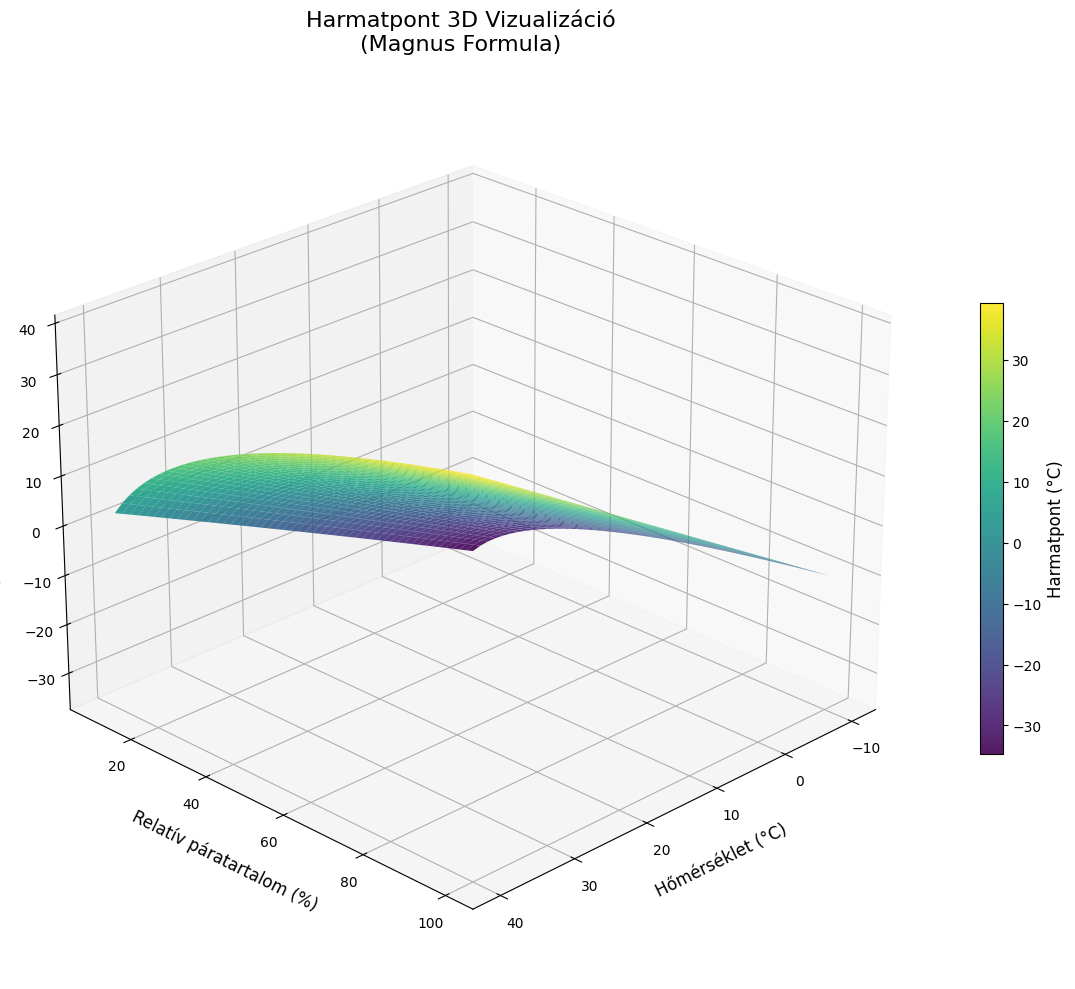

In [5]:
# 3D felületgrafikon megjelenítése Matplotlib-pel

# Nagy méretű rajz létrehozása
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 3D felületgrafikon
surface = ax.plot_surface(T, RH, DP, cmap='viridis', alpha=0.9, 
                         linewidth=0, antialiased=True)

# Tengelyek címkéi és cím
ax.set_xlabel('Hőmérséklet (°C)', fontsize=12, labelpad=10)
ax.set_ylabel('Relatív páratartalom (%)', fontsize=12, labelpad=10)
ax.set_zlabel('Harmatpont (°C)', fontsize=12, labelpad=10)
ax.set_title('Harmatpont 3D Vizualizáció\n(Magnus Formula)', fontsize=16, pad=20)

# Színskála hozzáadása
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=20)
cbar.set_label('Harmatpont (°C)', fontsize=12)

# Jobb nézőpont beállítása
ax.view_init(elev=25, azim=45)

# Rács megjelenítése
ax.grid(True, alpha=0.3)

# Grafikon megjelenítése
plt.tight_layout()
plt.show()

Alternatív nézőpontok...


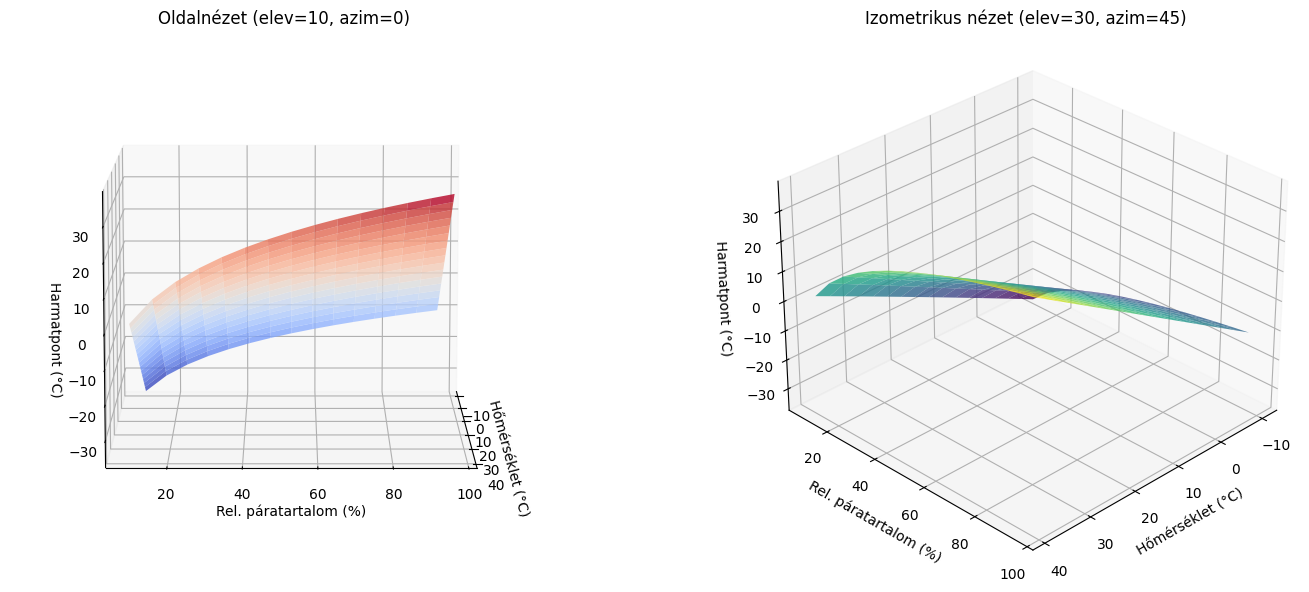

✅ Különböző nézőpontokból vizsgálhatod a harmatpont függvényt!


In [ ]:
# Különböző nézőpontok - statikus grafikonok
fig = plt.figure(figsize=(16, 6))

# Bal oldali: Oldalnézet
ax1 = fig.add_subplot(121, projection='3d')
surface1 = ax1.plot_surface(T[::3, ::3], RH[::3, ::3], DP[::3, ::3], 
                           cmap='coolwarm', alpha=0.8)
ax1.set_xlabel('Hőmérséklet (°C)')
ax1.set_ylabel('Rel. páratartalom (%)')
ax1.set_zlabel('Harmatpont (°C)')
ax1.set_title('Oldalnézet (elev=10, azim=0)')
ax1.view_init(elev=10, azim=0)

# Jobb oldali: Izometrikus nézet
ax2 = fig.add_subplot(122, projection='3d')
surface2 = ax2.plot_surface(T[::3, ::3], RH[::3, ::3], DP[::3, ::3], 
                           cmap='viridis', alpha=0.8)
ax2.set_xlabel('Hőmérséklet (°C)')
ax2.set_ylabel('Rel. páratartalom (%)')
ax2.set_zlabel('Harmatpont (°C)')
ax2.set_title('Izometrikus nézet (elev=30, azim=45)')
ax2.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

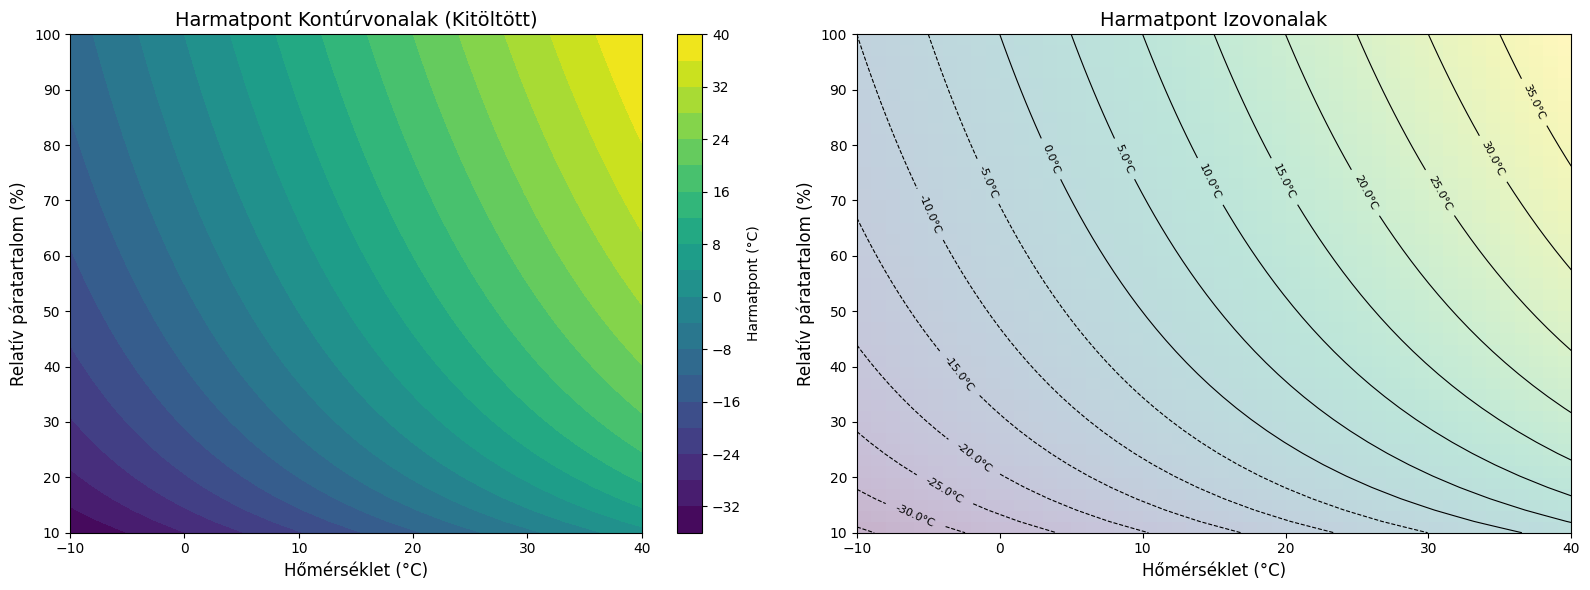

2D kontúr grafikonok megjelenítve!


In [ ]:
# Alternatív vizualizáció: Kontúrvonalak 2D-ben

# Két grafikon egymás mellett
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bal oldali: Kitöltött kontúr grafikon
contour_filled = ax1.contourf(T, RH, DP, levels=20, cmap='viridis')
ax1.set_xlabel('Hőmérséklet (°C)', fontsize=12)
ax1.set_ylabel('Relatív páratartalom (%)', fontsize=12)
ax1.set_title('Harmatpont Kontúrvonalak (Kitöltött)', fontsize=14)
cbar1 = plt.colorbar(contour_filled, ax=ax1)
cbar1.set_label('Harmatpont (°C)', fontsize=10)

# Jobb oldali: Vonalkontúr grafikon
contour_lines = ax2.contour(T, RH, DP, levels=15, colors='black', linewidths=0.8)
ax2.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f°C')
ax2.set_xlabel('Hőmérséklet (°C)', fontsize=12)
ax2.set_ylabel('Relatív páratartalom (%)', fontsize=12)
ax2.set_title('Harmatpont Izovonalak', fontsize=14)

# Háttérszín
ax2.imshow(DP, extent=[homerseklet_min, homerseklet_max, paratartalom_min, paratartalom_max], 
           origin='lower', cmap='viridis', alpha=0.3, aspect='auto')

plt.tight_layout()
plt.show()

## Elemzés és Következtetések

A 3D vizualizációból jól látható, hogy:

1. **Hőmérséklet hatása**: Magasabb hőmérséklet esetén a harmatpont is magasabb értékeket vesz fel.

2. **Páratartalom hatása**: Nagyobb relatív páratartalom esetén a harmatpont közelebb kerül a levegő hőmérsékletéhez.

3. **Függvény jellege**: A harmatpont függvény folytonos és sima, nincs benne hirtelen ugrás.

4. **Fizikai korlátok**: A harmatpont soha nem lehet magasabb, mint a levegő tényleges hőmérséklete.

5. **Praktikus alkalmazás**: Ez a vizualizáció segít megérteni, hogyan alakul a harmatpont különböző környezeti feltételek mellett.

### Magnus Formula
A használt Magnus formula a meteorológiában széles körben alkalmazott közelítő képlet a harmatpont számításához.